<a href="https://colab.research.google.com/github/someshsb1/cs666student/blob/main/Som_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

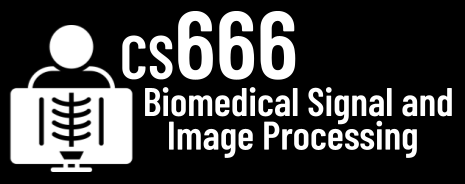

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [3]:
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 1.6 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [4]:
import biosppy
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')



```
# This is formatted as code
```

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [5]:
SAMPLING_RATE = 1000
SECONDS = len(signal)/SAMPLING_RATE

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

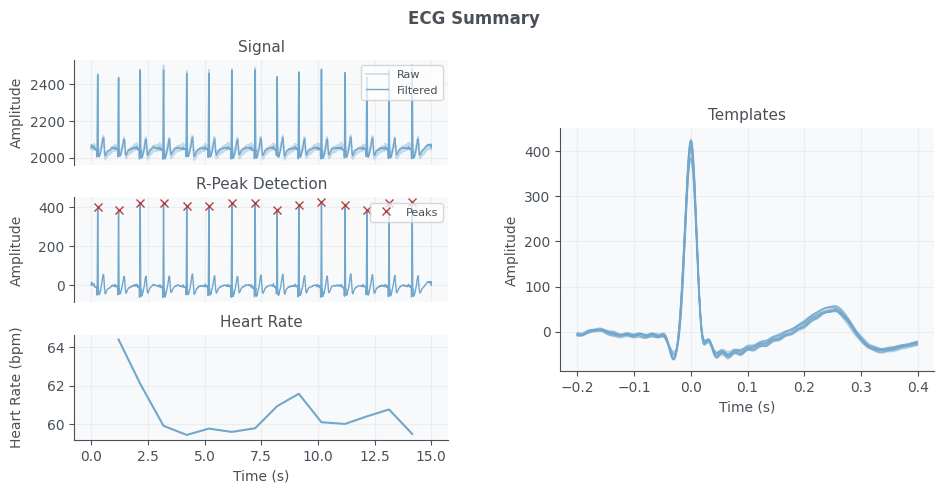

In [6]:
ecg_data=biosppy.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

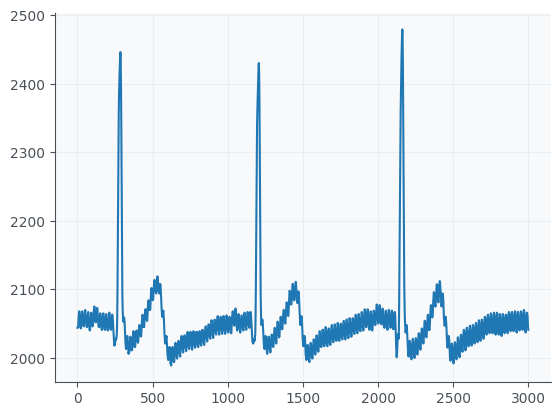

In [7]:
### unfiltered signal
plt.plot(signal[0:3000])

Text(530, 53.5002946923279, 'T')

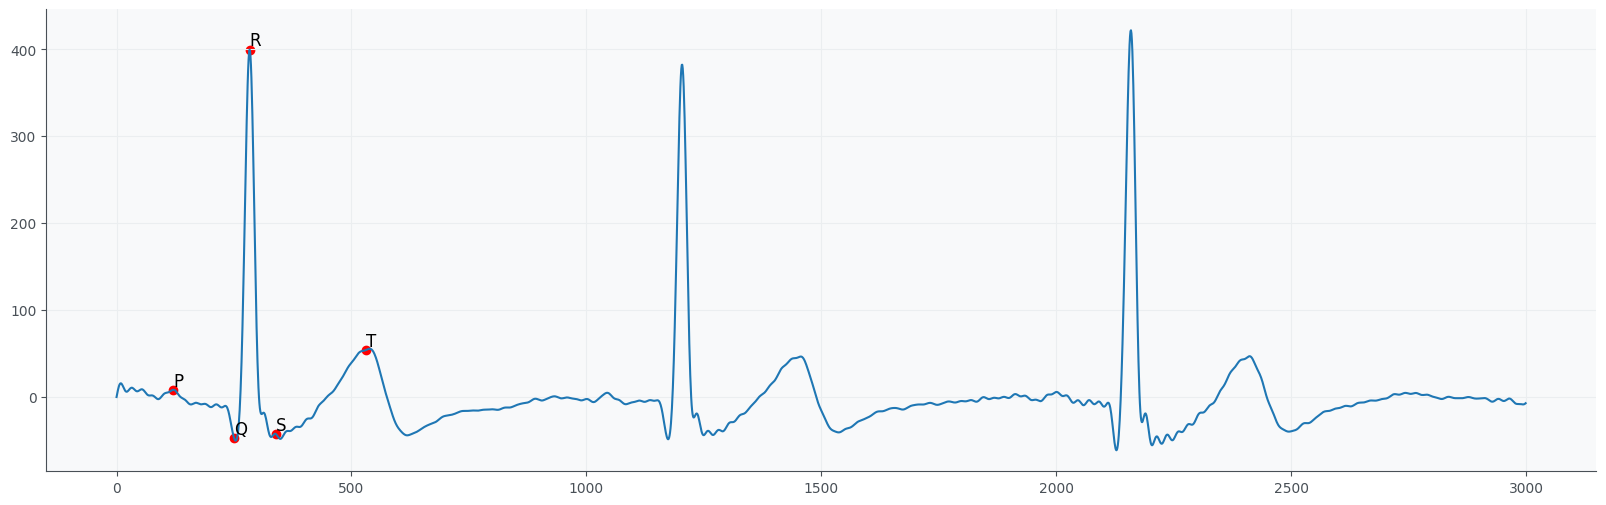

In [12]:
### filtered signal
plt.figure(figsize=(20, 6))
plt.plot(ecg_data['filtered'][0:3000])
filtered_ecg_data = ecg_data['filtered'][0:3000]

# Spotting the P, Q, R, S, T waves approximately.
p_peak = 120
q_peak = 250
r_peak = 283
s_peak = 340
t_peak = 530

# Marking the peaks on the plot
plt.scatter([p_peak, q_peak, r_peak, s_peak, t_peak],
            [filtered_ecg_data[p_peak], filtered_ecg_data[q_peak],
             filtered_ecg_data[r_peak], filtered_ecg_data[s_peak],
             filtered_ecg_data[t_peak]], color='red')

plt.text(p_peak, filtered_ecg_data[p_peak], 'P', fontsize=12, color='black', verticalalignment='bottom')
plt.text(q_peak, filtered_ecg_data[q_peak], 'Q', fontsize=12, color='black', verticalalignment='bottom')
plt.text(r_peak, filtered_ecg_data[r_peak], 'R', fontsize=12, color='black', verticalalignment='bottom')
plt.text(s_peak, filtered_ecg_data[s_peak], 'S', fontsize=12, color='black', verticalalignment='bottom')
plt.text(t_peak, filtered_ecg_data[t_peak], 'T', fontsize=12, color='black', verticalalignment='bottom')

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

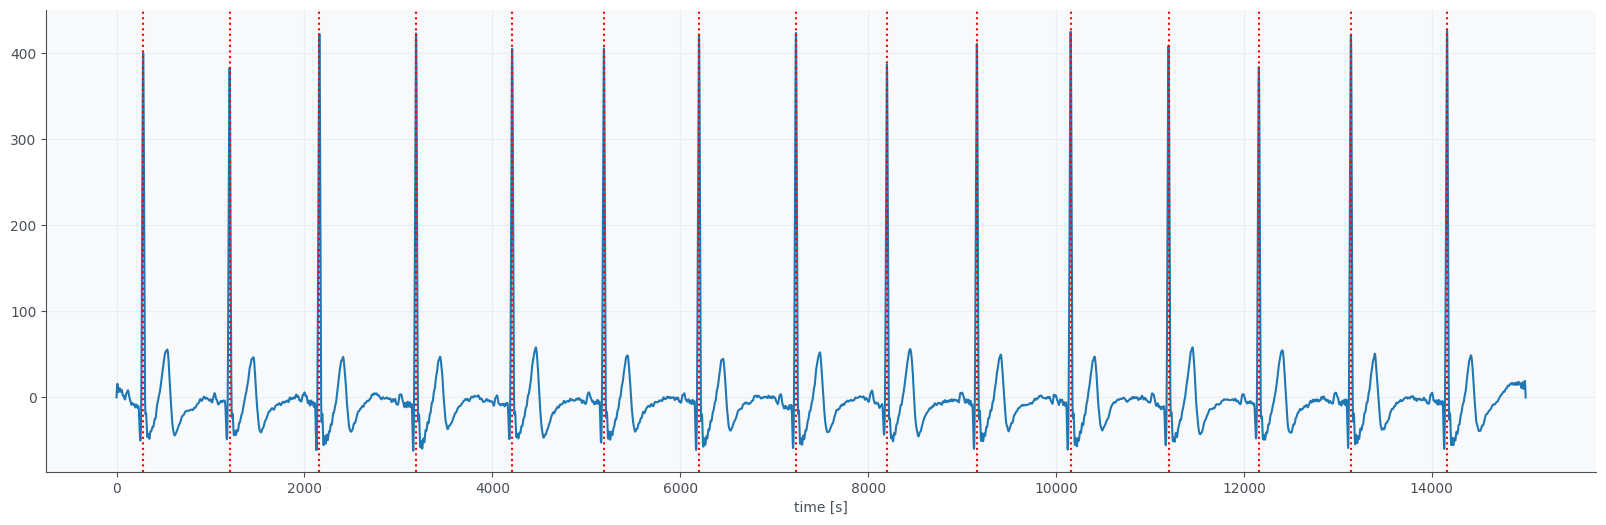

In [13]:
plt.figure(figsize=(20, 6))

plt.xlabel('time [s]')
plt.plot(ecg_data['filtered'])
for i in ecg_data['rpeaks']:
    plt.axvline(x=i, color='r', ls=':')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [14]:
!pip install neurokit2
import neurokit2 as nk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.4 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

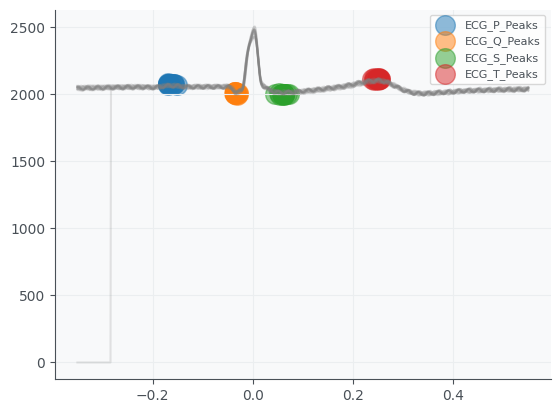

In [15]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(signal,
                                 ecg_data['rpeaks'],
                                 sampling_rate=SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [16]:
# TODO Does the detection work well?
## Seems to be working well

**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [47]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

In [19]:
# sleepecg full install

!pip install "sleepecg[full]"

import sleepecg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


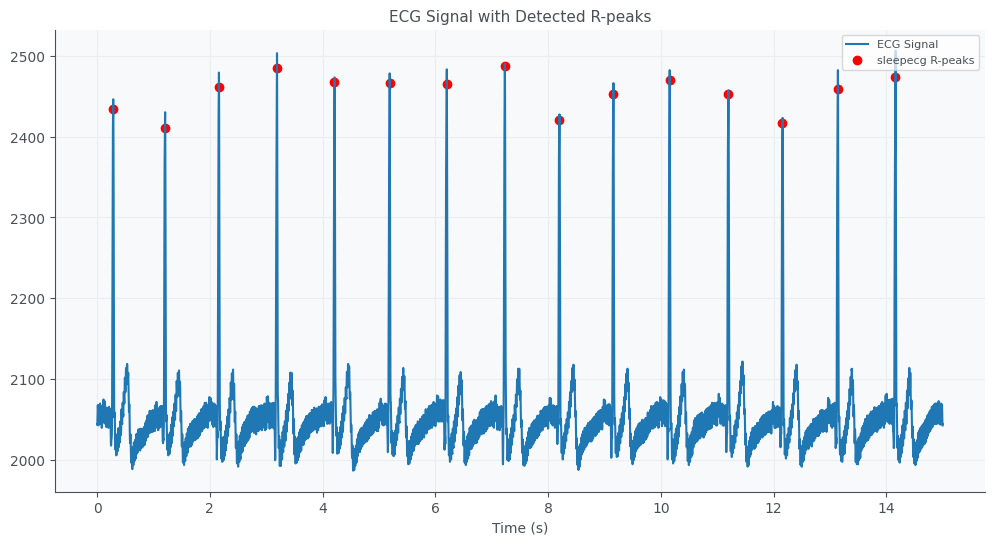

In [20]:
rpeaks = sleepecg.detect_heartbeats(signal, SAMPLING_RATE)
time = [i / SAMPLING_RATE for i in range(len(signal))]

# Plot the ECG signal
plt.figure(figsize=(12, 6))
plt.plot(time, signal, label='ECG Signal')
plt.xlabel('Time (s)')
plt.title('ECG Signal with Detected R-peaks')

# Plot R-peaks
rpeak_times = [peak / SAMPLING_RATE for peak in rpeaks]
plt.scatter(rpeak_times, [signal[peak] for peak in rpeaks], color='red', label='sleepecg R-peaks')
plt.legend()


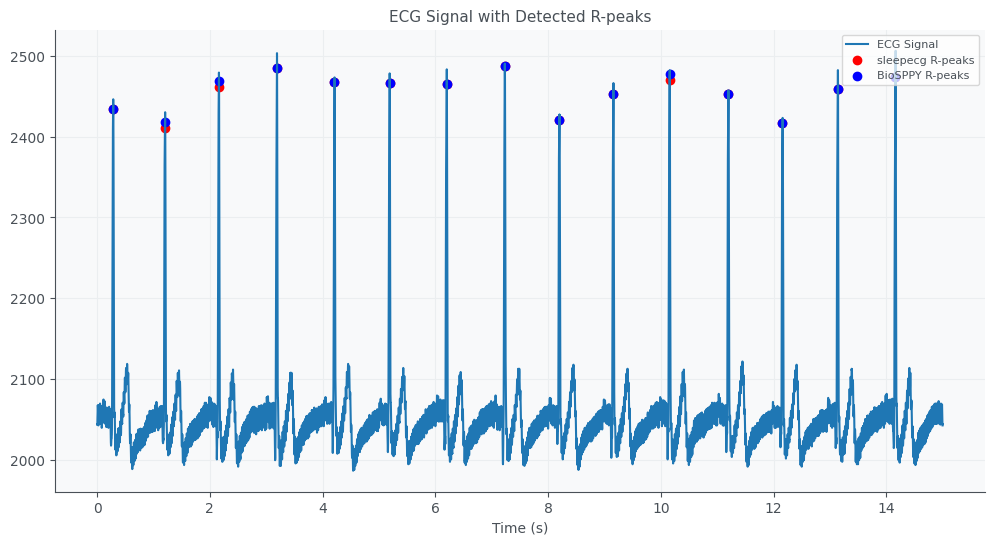

In [21]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
## Yes, as observed from the plotted graph, seems to be slightly different.

##comparing the biosppy and sleepecg graphs
rpeaks = sleepecg.detect_heartbeats(signal, SAMPLING_RATE)
time = [i / SAMPLING_RATE for i in range(len(signal))]

# Plot the ECG signal
plt.figure(figsize=(12, 6))
plt.plot(time, signal, label='ECG Signal')
plt.xlabel('Time (s)')
plt.title('ECG Signal with Detected R-peaks')

# Plot R-peaks
rpeak_times = [peak / SAMPLING_RATE for peak in rpeaks]
plt.scatter(rpeak_times, [signal[peak] for peak in rpeaks], color='red', label='sleepecg R-peaks') #sleepecg
plt.scatter(rpeak_times, [signal[peak] for peak in ecg_data[2]], color='blue', label='BioSPPY R-peaks') #biosppy

plt.legend()

In [22]:
##Calculating MSE below
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(rpeaks, ecg_data[2])
print("Mean squared error:", mse)

Mean squared error: 0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

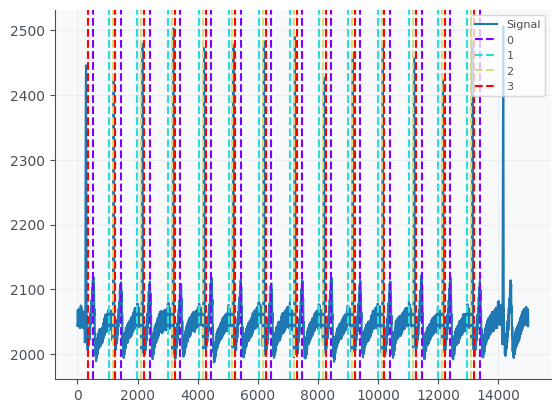

In [36]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(signal, ecg_data[2], sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot(
    [waves_peak['ECG_T_Peaks'],
     waves_peak['ECG_P_Peaks'],
     waves_peak['ECG_Q_Peaks'],
     waves_peak['ECG_S_Peaks']], signal)


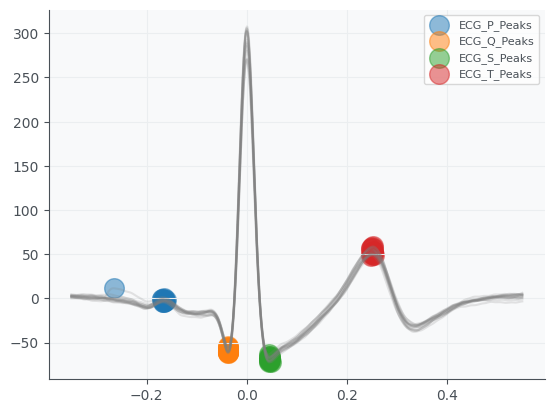

In [34]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.


filtered = nk.signal_filter(signal, sampling_rate=1000, lowcut=1.5, highcut=20)
_, waves_peak = nk.ecg_delineate(filtered,
                                    ecg_data['rpeaks'],
                                    sampling_rate=SAMPLING_RATE,
                                    method="peak",
                                    show=True,
                                    show_type='peaks')

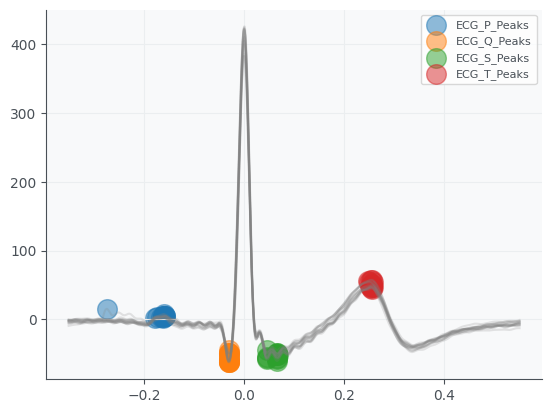

In [33]:
# Finally, run the delineation on the filtered signal from BioSPPY.

_, waves_peak = nk.ecg_delineate(ecg_data['filtered'],
                                 ecg_data['rpeaks'],
                                 sampling_rate=SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

In [ ]:
# TODO Which one works the best?
## The latter works the best I feel.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#